In [1]:
import cv2
import matplotlib.pyplot as plt
font = cv2.FONT_HERSHEY_SIMPLEX
cascPath = "C:/Users/asus/Anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

In [2]:
def get_img(path):   
    return cv2.imread(path)

In [3]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
def get_faces(img):
    # Detect faces
    return faceCascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)

In [5]:
def draw_faces(img, faces, name):
    img_faces = img.copy()
    #for each faces
    for (x, y, w, h) in faces: 
    # Draw rectangle around the face
        cv2.rectangle(img_faces, (x, y-int(0.3*h)), (x+w, y+int(1.1*h)), (255, 255, 255), 3)
    plt.figure(figsize=(24,8))
    plt.subplot(1,2,1)
    plt.imshow(convertToRGB(img))
    plt.subplot(1,2,2)
    plt.imshow(convertToRGB(img_faces))
    plt.show()
    cv2.imwrite(name,img_faces)

In [33]:
def visualise(faces):
    N = len(faces)
    plt.figure(figsize = (N*3,4))
    for i, face in enumerate(faces):
        fig1 = plt.subplot(1,N,i+1)
        plt.imshow(convertToRGB(face))
    plt.show()

In [12]:
def resize_imgs(img, faces):
    images = []
    for i,(x, y, w, h) in enumerate(faces): 
        img_to_resize = img[y-int(0.3*h):y+int(1.1*h),x:x+w]
        scale_percent = 512/(int(0.3*h)+int(1.1*h))
        width = int(img_to_resize.shape[1] * scale_percent)
        height = int(img_to_resize.shape[0] * scale_percent)
        dim = (width, height)
        # resize image
        resized = cv2.resize(img_to_resize, dim, interpolation = cv2.INTER_AREA)
        images.append(resized)
    visualise(images)
    return images

In [13]:
def write_faces(imgs, name):
    for i,img in enumerate(imgs):
        cv2.imwrite(name+'_'+str(i)+'.png', img)

In [30]:
def face_extraction(img, name):
    img_faces = get_faces(img)
    imgs = resize_imgs(img,faces)
    write_faces(imgs, name)

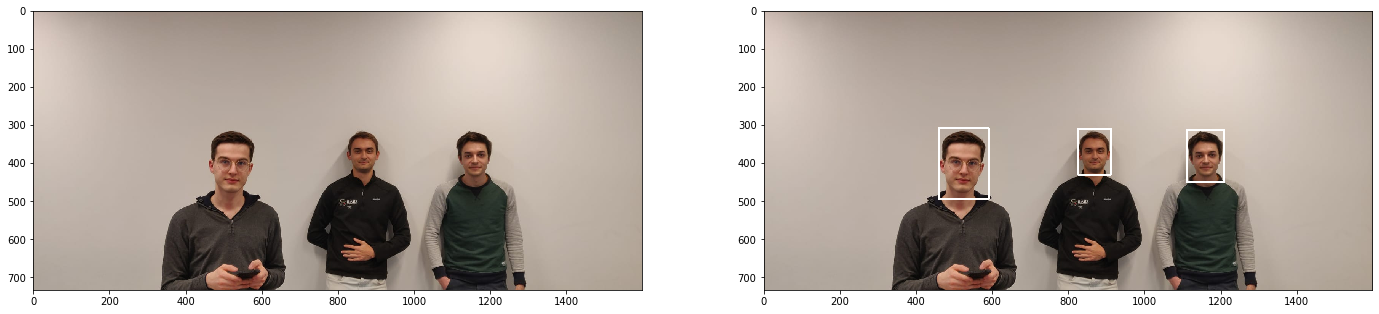

In [31]:
img = get_img('06.jpg')
faces = get_faces(img)
draw_faces(img, faces, 'Faces_detection_1.png')

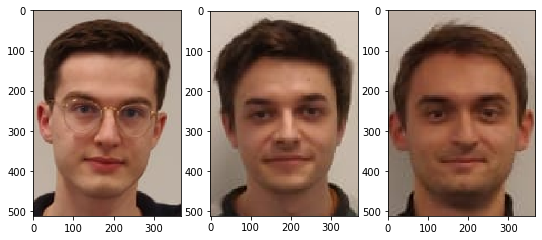

In [32]:
face_extraction(img, 'face')